In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
file_path = '/content/drive/MyDrive/Deekshitha/Datasets/daily_solar_data.csv'
print(os.path.exists(file_path))

True


In [ ]:
df = pd.read_csv(file_path)
df.head()

,Date,Radio Flux 10.7cm,Sunspot Number,Sunspot Area (10^6 Hemis.),New Regions,Stanford Mean Solar Field (GOES15),Stanford Background X-Ray Flux,Flares: C,Flares: M,Flares: X,Flares: S,Flares: 1,Flares: 2,Flares: 3
0,1997-01-01,72,0,0,0,*,A0.5,0,0,0,-1,-1,-1,-1
1,1997-01-02,72,0,0,0,*,A0.5,0,0,0,-1,-1,-1,-1
2,1997-01-03,73,0,0,0,3,A0.5,0,0,0,-1,-1,-1,-1
3,1997-01-04,74,13,10,1,*,A0.6,0,0,0,-1,-1,-1,-1
4,1997-01-05,74,15,20,0,5,A0.7,0,0,0,-1,-1,-1,-1


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10330 entries, 0 to 10329
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Date                                10330 non-null  object
 1   Radio Flux 10.7cm                   10330 non-null  int64 
 2   Sunspot Number                      10330 non-null  int64 
 3   Sunspot Area (10^6 Hemis.)          10330 non-null  int64 
 4   New Regions                         10330 non-null  int64 
 5   Stanford Mean Solar Field (GOES15)  10330 non-null  object
 6   Stanford Background X-Ray Flux      10330 non-null  object
 7   Flares: C                           10330 non-null  int64 
 8   Flares: M                           10330 non-null  int64 
 9   Flares: X                           10330 non-null  int64 
 10  Flares: S                           10330 non-null  int64 
 11  Flares: 1                           10330 non-null  in

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10330 entries, 1997-01-01 to 2024-04-12
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Radio Flux 10.7cm                   10330 non-null  int64 
 1   Sunspot Number                      10330 non-null  int64 
 2   Sunspot Area (10^6 Hemis.)          10330 non-null  int64 
 3   New Regions                         10330 non-null  int64 
 4   Stanford Mean Solar Field (GOES15)  10330 non-null  object
 5   Stanford Background X-Ray Flux      10330 non-null  object
 6   Flares: C                           10330 non-null  int64 
 7   Flares: M                           10330 non-null  int64 
 8   Flares: X                           10330 non-null  int64 
 9   Flares: S                           10330 non-null  int64 
 10  Flares: 1                           10330 non-null  int64 
 11  Flares: 2                           1

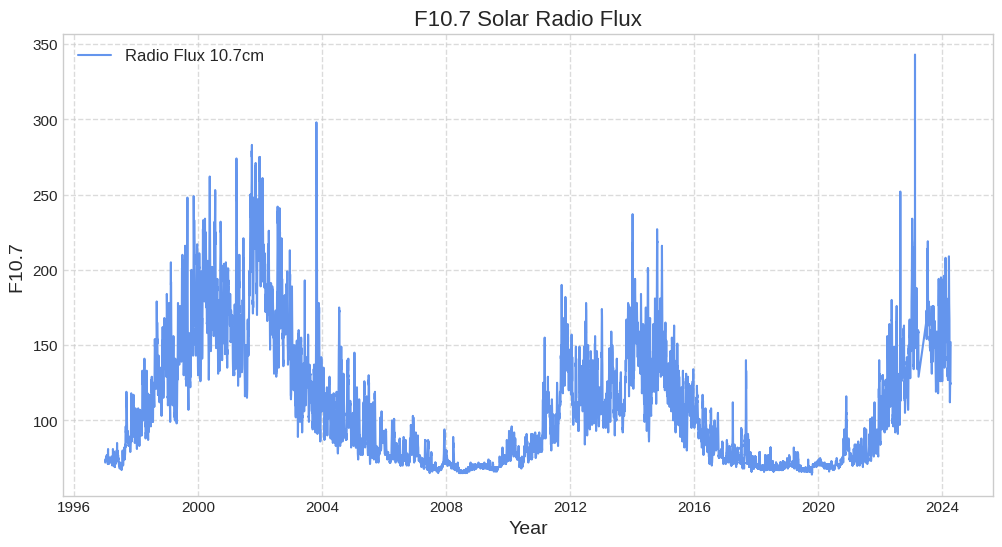

In [ ]:
# Set a beautiful style using seaborn
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid') # Another elegant style

# Create the line plot with enhanced aesthetics
plt.plot(df.index,'Radio Flux 10.7cm',data=df, color="#6495ED", linewidth=1.5, ) # Cornflower blue
#plt.plot('time-tag','smoothed_f10.7',data=df1, color="#FF6866", linewidth=1.5) # Light blue
# Add a subtle gradient fill under the curve
#plt.fill_between(years, sunspot_numbers, alpha=0.2, color="#ADD8E6") # Light blue

# Customize the plot elements
plt.xlabel("Year", fontsize=14)
plt.ylabel("F10.7 ", fontsize=14)
plt.title("F10.7 Solar Radio Flux", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

In [ ]:
# Select the f10.7 time series
f10 = df['Radio Flux 10.7cm'].dropna()
f10

,Radio Flux 10.7cm
Date,
1997-01-01,72
1997-01-02,72
1997-01-03,73
1997-01-04,74
1997-01-05,74
...,...
2024-04-08,125
2024-04-09,124
2024-04-10,131


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# ----------- Fit SARIMA model ------------
# Set SARIMA parameters (these are example values; tuning improves accuracy)
model = SARIMAX(f10,
                order=(1,1,1),
                seasonal_order=(1,1,1,12*11))

results = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# ----------- Forecast for 15 years (180 months) ------------
forecast_steps = 180
forecast = results.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Generate future date index
forecast_index = pd.date_range(start=f10.index[-1] + pd.DateOffset(months=1),
                               periods=forecast_steps, freq='MS')
predicted_values.index = forecast_index
conf_int.index = forecast_index

# ----------- Create a forecast DataFrame ------------
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'f10.7_predicted': predicted_values,
    'Lower_CI': conf_int.iloc[:, 0],
    'Upper_CI': conf_int.iloc[:, 1]
}).reset_index(drop=True)

In [ ]:
# ----------- Plot forecast ------------
plt.figure(figsize=(14, 6))
plt.plot(f10, label='Observed', color='blue')
plt.plot(forecast_index, predicted_values, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('SARIMA Forecast of Solar Radio Flux (f10.7) for Next 15 Years')
plt.xlabel('Date')
plt.ylabel('f10.7 (sfu)')
plt.legend()
plt.tight_layout()
plt.show()